# Análisis Inmobiliario en Mérida.

Primero se realiza la extracción de los datos mediante _web scraping_, esta información pertenece a la página **Inmuebles24**. En la presente base de datos se encuentran las características principales de las casas en venta de la ciudad de Mérida, Yucatán; dicha base ya se encuentra depurada y lista para ser analizada, este proceso se realizó de manera previa en _Excel_.  


Observemos la base de datos que se obtuvo:

In [5]:
import pandas as pd

In [9]:
base_inmuebles = pd.read_csv('Inmuebles24.csv', sep = ';')

In [11]:
base_inmuebles.head(20)

,precio,mt construido,mt totales,cuartos,banos
0,4715000,289,990,3,3
1,2650000,167,99,2,2
2,1740000,106,99,2,2
3,6250000,365,985,3,4
4,691095,56,98,2,1
5,2750000,167,98,2,2
6,2650000,167,98,2,2
7,2650000,167,98,2,2
8,2650000,167,98,2,2
9,2650000,167,98,2,2


In [13]:
base_inmuebles.shape

(2355, 5)

Podemos observar que la base cuenta con 2356 registros de 5 variables, las cuales son: _precio_, _mt construido_, _mt totales_, _cuartos_ y _banos_. Las cuales representan el costo de la vivienda, los metros que se han construido, los metros del terreno, el número de recámaras y baños respectivamente.


Haciendo un análisis exploratorio de los datos podemos obtener las siguientes características:

In [18]:
base_inmuebles.describe()

,precio,mt construido,mt totales,cuartos,banos
count,2.355000e+03,2355.000000,2355.000000,2355.000000,2355.000000
mean,4.352325e+06,335.286624,341.663270,2.987261,2.931635
std,4.205017e+06,3996.326527,379.554575,0.861628,1.213419
min,2.983510e+05,24.000000,13.000000,1.000000,1.000000
25%,2.285530e+06,153.000000,164.500000,2.000000,2.000000
50%,3.200000e+06,212.000000,251.000000,3.000000,3.000000
75%,5.100000e+06,300.000000,385.000000,3.000000,4.000000
max,6.000000e+07,194050.000000,7589.000000,9.000000,9.000000


De aquí se obtiene que la media de precio por vivienda es de **$4,352,325**, la de los metros cuadrados construidos es de **335.2866** y la del terreno de **341.6632**; por su parte, tanto en cuartos como baños podemos concluir que tienen un promedio de **3** por vivienda si hacemos el redondeo correspondiente.
También es importante destacar que nuestras tres primeras variables tienen desviaciones considerablemente altas, lo cual indica que es sencillo encontrar datos dentro de un rango alto de valores al rededor de estas. 

Observemos las gráficas de dispersión de cada una de las variables respecto al precio:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

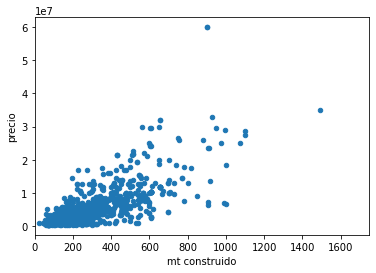

In [48]:
base_inmuebles.plot.scatter(x='mt construido', y='precio', xlim=(0,1750));


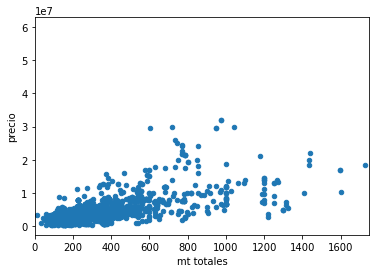

In [50]:
base_inmuebles.plot.scatter(x='mt totales', y='precio', xlim=(0,1750));


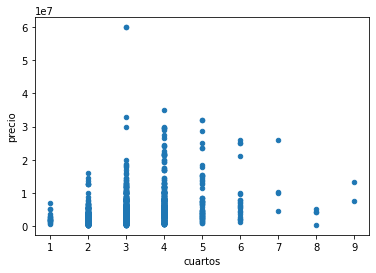

In [52]:
base_inmuebles.plot.scatter(x='cuartos', y='precio');

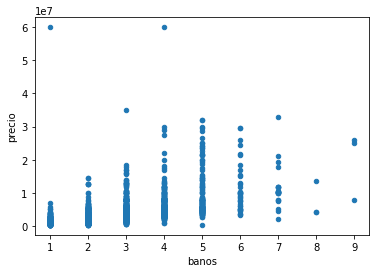

In [54]:
base_inmuebles.plot.scatter(x='banos', y='precio');


De manera intuitiva podemos pensar que existe algún tipo de relación lineal entre las variables de metros cuadrados de construcción y de terreno con el precio de una casa, para poder reforzar dicha hipótesis se realiza la matriz de correlación:

In [57]:
correlacion = base_inmuebles.corr()

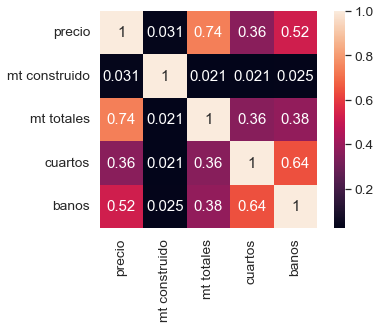

In [67]:
sns.set(font_scale = 1.25)
hm = sns.heatmap(correlacion, cbar=True, annot=True, square = True)
plt.show()

La matriz de correlación indica que la única variable con una relación lineal considerable con el precio de venta es la de de metros cuadrados del terreno. Por lo tanto hagamos una regresión simple de dichas variables:

In [75]:
explicada = base_inmuebles['precio']
explicativa = base_inmuebles[['mt totales']]


In [70]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()
model.fit (X= explicativa, y = explicada);

In [80]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['mt totales'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8167.32323632]),
 '_residues': 1.9002695113857172e+16,
 'rank_': 1,
 'singular_': array([18415.24325044]),
 'intercept_': 1561850.3454608023}

De aquí podemos obtener la siguiente función de regresión: 

 $$Precio = 1,561,850.3454 + 8167.3232 \cdot m^{2}$$

Hagamos un ejemplo de predicción de una vivienda que tiene un total de **255$m^2$** de terreno:

In [91]:
model.predict(X=[[255]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3644517.77072295])

Dando un precio de **$3,644,517.77**, valor que podemos comparar con los valores pertecientes a la base de datos:

In [99]:
base_255 = base_inmuebles['mt totales'] == 255
regresion_255 = base_inmuebles[base_255]
regresion_255['precio'].mean()

3333700.0

Podemos comprobar que arroja un valor muy cercano a la media de los precios de todas las viviendas que cuentan con la misma cantidad de metros cuadrados de terreno.